In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler , StandardScaler
from sklearn.metrics import accuracy_score , mean_squared_error
import  sklearn.datasets

# Loading data set

In [66]:
breast_cancer = sklearn.datasets.load_breast_cancer()

In [67]:
X = breast_cancer.data
Y = breast_cancer.target

In [68]:
print(X)

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]


In [69]:
print(Y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

In [70]:
data = pd.DataFrame(breast_cancer.data , columns=breast_cancer.feature_names)

In [71]:
data.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [72]:
data['class'] = breast_cancer.target

In [73]:
data.head(2)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0


In [74]:
data.groupby('class').mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
class,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


In [75]:
X = data.drop('class',axis=1)
Y = data['class']

In [76]:
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=1)

In [77]:
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)
type(X_train)
#type(Y_train)
Y_train

(455, 30) (114, 30) (455,) (114,)


190    0
85     0
512    0
57     0
142    1
      ..
201    0
285    1
249    1
316    1
161    0
Name: class, Length: 455, dtype: int32

In [78]:
X_train = X_train.values

In [79]:
type(X_train)

numpy.ndarray

In [80]:
X_test = X_test.values

In [81]:
Y_train = Y_train.values

In [82]:
Y_test = Y_test.values

In [83]:
from tqdm import tqdm_notebook

# Sigmoid class

In [84]:
class Sigmoid:
    def __init__(self):
        self.w = None
        self.b = None
        
    def perceptron(self,x):
        return (np.dot(x,self.w.T) + self.b)
    
    def sigmoid(self,x):
        return 1.0 /(1.0 + np.exp(-x))
    
    def grad_w(self,x,y):
        y_pred = self.sigmoid(self.perceptron(x))
        return (y_pred - y) * y_pred * (1-y_pred)*x
    
    def grad_b(self,x,y):
        y_pred = self.sigmoid(self.perceptron(x))
        return (y_pred - y) * y_pred * (1-y_pred)
    
    def fit(self,x,y,epochs=1,lr=1,initialise=True,display_loss=True):
        if initialise:
            self.w = np.random.randn(x.shape[1])
            self.b = 0
        if display_loss:
            loss = {}
        for i in tqdm_notebook(range(epochs),total=epochs,unit='epoch'):
            dw = 0
            db = 0
            for X , Y in zip(x,y):
                dw += self.grad_w(X,Y)
                db += self.grad_b(X,Y)
            self.w -= lr*dw
            self.b -= lr*db
            
            if display_loss:
                loss[i] = mean_squared_error(self.sigmoid(self.perceptron(x)),y)
                
        if display_loss:
            plt.plot(np.array(list(loss.values())).astype(float))
            plt.xlabel("Epochs")
            plt.ylabel("Loss")
            plt.show()
            
    def predict(self,x):
        Y_pred = []
        for X in x:
            result = self.sigmoid(self.perceptron(X))
            Y_pred.append(result)
        return np.array(Y_pred)
    

s

In [85]:
sigmoid = Sigmoid()

In [86]:
scaler = StandardScaler()

In [87]:
X_scaled_train = scaler.fit_transform(X_train)
X_scaled_test = scaler.transform(X_test)

c:\users\hp\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:26: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


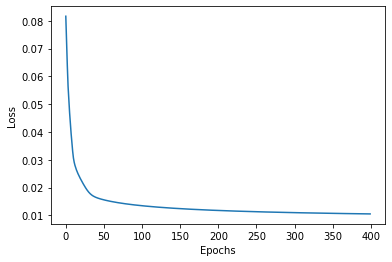

In [130]:
sigmoid.fit(X_scaled_train,Y_train,epochs=400,lr=0.05)

In [131]:
Y_pred_train = sigmoid.predict(X_scaled_train)
Y_pred_test = sigmoid.predict(X_scaled_test)

In [132]:
minmax_scaler = MinMaxScaler()

In [133]:
Y_pred_binarised_train = Y_pred_train >= 0.5
Y_pred_binarised_test = Y_pred_test >=0.5

In [134]:
accuracy_train = accuracy_score(Y_pred_binarised_train,Y_train)
accuracy_test = accuracy_score(Y_pred_binarised_test,Y_test)

In [135]:
print("Train accuracy ",accuracy_train)
print("Test accuracy ",accuracy_test)

Train accuracy  0.9912087912087912
Test accuracy  0.9649122807017544


In [136]:
df = sklearn.datasets.load_iris()

In [140]:
X = df.data
#print(X)

In [143]:
Y = df.target
#print(Y)

In [147]:
data = pd.DataFrame(df.data , columns = df.feature_names)

In [148]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [149]:
data['class'] = df.target

In [150]:
data.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


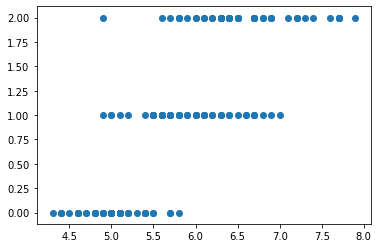

In [157]:
X = data['sepal length (cm)']
Y = data['class']
plt.scatter(X,Y)
plt.show()

In [167]:
X = data.drop('class',axis = 1)
Y = data['class']

In [168]:
X_train ,X_test, Y_train , Y_test = train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=1)

In [169]:
type(X_train)
print(X_train.shape,X_test.shape)

(120, 4) (30, 4)


In [170]:
X_train = X_train.values

In [171]:
X_test = X_test.values

In [172]:
Y_train = Y_train.values

In [174]:
Y_test = Y_test.values

In [175]:
X_scaled_train = scaler.fit_transform(X_train)
X_scaled_test = scaler.transform(X_test)

c:\users\hp\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:26: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


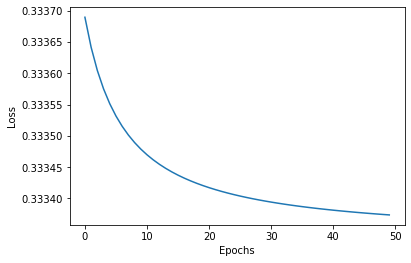

In [200]:
sigmoid.fit(X_scaled_train , Y_train , epochs=50,lr=0.5)

In [201]:
Y_pred_train = sigmoid.predict(X_scaled_train)
Y_pred_test = sigmoid.predict(X_scaled_test)
Y_pred_binarised_train = Y_pred_train >=0.5
Y_pred_binarised_test = Y_pred_test >=0.5

In [202]:
train_accuracy = accuracy_score(Y_pred_binarised_train , Y_train)
test_accuracy = accuracy_score(Y_pred_binarised_test , Y_test)

In [203]:
print("Train accuracy ",train_accuracy)
print("Test accuracy ",test_accuracy)

Train accuracy  0.6666666666666666
Test accuracy  0.6666666666666666
